In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_excel('data.xlsx')

In [3]:
df.head()

,competition,home_team,result,away_team,tactic,basel_result
0,Swiss Cup,FC Basel,1:2,BSC Young Boys,4-4-2 double 6,L
1,Swiss Cup,FC Basel,6:1,FC Winterthur,4-4-2 double 6,W
2,Europa League,Shakhtar D.,4:1,FC Basel,4-1-4-1,L
3,Europa League,FC Basel,1:0,E. Frankfurt,4-2-3-1,W
4,Super League,FC Basel,0:0,FC Luzern,4-2-3-1,D


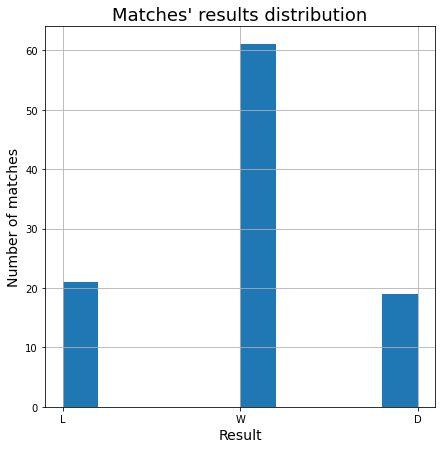

In [9]:
plt.figure(figsize=(7,7))
df['basel_result'].hist();
plt.title('Matches\' results distribution',fontsize=18)
plt.ylabel('Number of matches',fontsize=14)
plt.xlabel('Result',fontsize=14)
plt.show()

## What tournaments has the team participated in?

In [12]:
df.competition.unique()

array(['Swiss Cup', 'Europa League', 'Super League',
       'UEFA Champions League Qualifying', 'Europa League Qualifying'],
      dtype=object)

## what is the best tactic in general?

In [13]:
points=[]
for i in range(len(df.basel_result)):
    if df.basel_result[i]=='W':
        points.append(3)
    elif df.basel_result[i]=='L':
        points.append(0)
    else:
        points.append(1)

In [14]:
df['points']=points

In [15]:
df.head()

,competition,home_team,result,away_team,tactic,basel_result,points
0,Swiss Cup,FC Basel,1:2,BSC Young Boys,4-4-2 double 6,L,0
1,Swiss Cup,FC Basel,6:1,FC Winterthur,4-4-2 double 6,W,3
2,Europa League,Shakhtar D.,4:1,FC Basel,4-1-4-1,L,0
3,Europa League,FC Basel,1:0,E. Frankfurt,4-2-3-1,W,3
4,Super League,FC Basel,0:0,FC Luzern,4-2-3-1,D,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   competition   101 non-null    object
 1   home_team     101 non-null    object
 2   result        101 non-null    object
 3   away_team     101 non-null    object
 4   tactic        101 non-null    object
 5   basel_result  101 non-null    object
 6   points        101 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 5.6+ KB


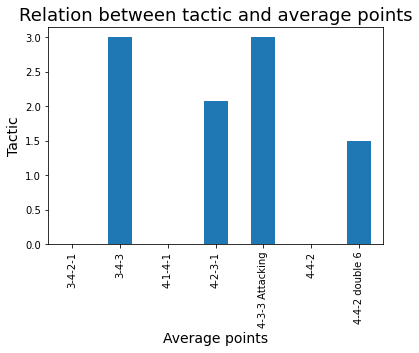

In [22]:
df.groupby('tactic')['points'].mean().plot(kind='bar');
plt.title('Relation between tactic and average points',fontsize=18)
plt.ylabel('Tactic',fontsize=14)
plt.xlabel('Average points',fontsize=14)
plt.show()

## in general 3-4-3 & 4-3-3 attacking has the highest points average but, at first we should see how many times this tactics used

In [18]:
df.tactic.value_counts()

4-2-3-1            90
4-4-2 double 6      6
4-1-4-1             1
4-4-2               1
3-4-2-1             1
4-3-3 Attacking     1
3-4-3               1
Name: tactic, dtype: int64

## As we can see, we cannot judge any tactic except 4-2-3-1 & 4-4-2 double 6 
# It's clear that 4-2-3-1 is the best tactic

## What is the tactic used against direct competitors and big teams?

In [ ]:
# i choose the top leagues and matches with your direct competitor in the league to analyze them

In [28]:
df1=df.query('competition == "Europa League"')

# this man shows great efforts in Europa League

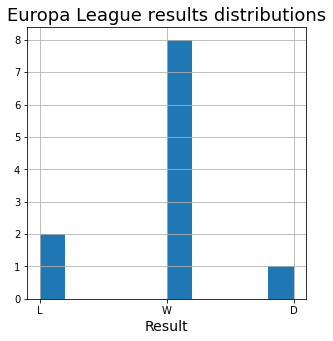

In [46]:
plt.figure(figsize=(5,5))
df.query('competition == "Europa League"')['basel_result'].hist();
plt.title('Europa League results distributions',fontsize=18)
plt.xlabel('Result',fontsize=14)
plt.show()

In [29]:
df2=df[df['home_team']=="BSC Young Boys"]

In [31]:
df3=df[df['away_team']=="BSC Young Boys"]

In [34]:
df1=df1.append(df2)

C:\Users\Ahmed said\AppData\Local\Temp\ipykernel_8288\3591658828.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1=df1.append(df2)


In [35]:
df1=df1.append(df3)

C:\Users\Ahmed said\AppData\Local\Temp\ipykernel_8288\2266375872.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1=df1.append(df3)


In [38]:
df4=df.query('competition == "Europa League Qualifying"')

In [40]:
df5=df.query('competition == "UEFA Champions League Qualifying"')

In [41]:
df1=df1.append(df4)

C:\Users\Ahmed said\AppData\Local\Temp\ipykernel_8288\1306335153.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1=df1.append(df4)


In [42]:
df1=df1.append(df5)

C:\Users\Ahmed said\AppData\Local\Temp\ipykernel_8288\1549571933.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1=df1.append(df5)


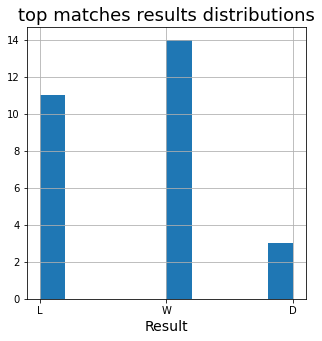

In [48]:
plt.figure(figsize=(5,5))
df1['basel_result'].hist();
plt.title('top matches results distributions',fontsize=18)
plt.xlabel('Result',fontsize=14)
plt.show()
# matches in UEFA Champions League Qualifying,Europa League Qualifying,vs BSC Young Boys,Europa League

In [49]:
df2=df2.append(df3)

C:\Users\Ahmed said\AppData\Local\Temp\ipykernel_8288\1983128949.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2=df2.append(df3)


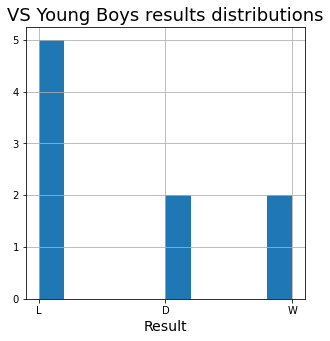

In [51]:
plt.figure(figsize=(5,5))
df2['basel_result'].hist();
plt.title('VS Young Boys results distributions',fontsize=18)
plt.xlabel('Result',fontsize=14)
plt.show()

## Poor results against the direct competitor